In [51]:
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import json
import numpy as np
%matplotlib inline

In [6]:
def read_csv(fname):
    f = lambda x : json.loads(x.replace("'","\""))
    df = pd.read_csv(fname, converters={'sensor_type': f}, index_col=0)
    return df

In [7]:
def save_graph(plot, fname='saved.png'):
    fig = plot.get_figure()
    fig.savefig(fname)

,algorithm,auc,ma_window,max_iter,model_idx,ms_interval,n_clusters,n_neighbors,n_record,n_train,sensor_type,type
0,NaN,0.777778,1,3.0,0,20,1.0,NaN,1,1,"[rssi.a, rssi.b]",k-means
24,NaN,0.783125,1,3.0,0,20,1.0,NaN,1,5,"[rssi.a, rssi.b]",k-means
48,NaN,0.788264,1,3.0,0,20,1.0,NaN,1,10,"[rssi.a, rssi.b]",k-means
72,NaN,0.823542,1,3.0,0,20,1.0,NaN,1,20,"[rssi.a, rssi.b]",k-means


,algorithm,auc,ma_window,max_iter,model_idx,ms_interval,n_clusters,n_neighbors,n_record,n_train,sensor_type,type
96,ball_tree,0.864491,1,NaN,1,20,NaN,1.0,1,1,"[rssi.a, rssi.b]",kNN
120,ball_tree,0.849120,1,NaN,1,20,NaN,1.0,1,5,"[rssi.a, rssi.b]",kNN
144,ball_tree,0.849676,1,NaN,1,20,NaN,1.0,1,10,"[rssi.a, rssi.b]",kNN
168,ball_tree,0.856157,1,NaN,1,20,NaN,1.0,1,20,"[rssi.a, rssi.b]",kNN


[ 0.86449074  0.84912037  0.84967593  0.85615741]


,n_train,k-means,kNN
0,1.0,0.777778,0.864491
1,5.0,0.783125,0.849120
2,10.0,0.788264,0.849676
3,20.0,0.823542,0.856157


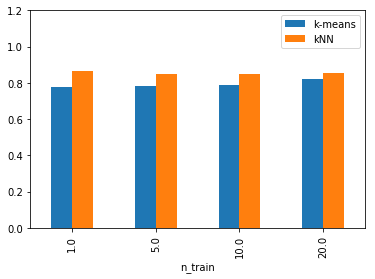

In [87]:
csv_file = 'test_record-20170425.csv'
df = read_csv(csv_file)
df.sort_values(by=['auc'], ascending=False).head()

df1 = df[
    (df['n_record'] == 1) & 
    (df['ms_interval'] == 20) &
    (df['sensor_type'].apply(lambda x: len(x) == 2)) &
    (df['type'] == 'k-means')
]
display(df1)

df2 = df[
    (df['n_record'] == 1) & 
    (df['ms_interval'] == 20) &
    (df['sensor_type'].apply(lambda x: len(x) == 2)) &
    (df['type'] == 'kNN')
]
display(df2)

def show_graph(df1, df2, x_title, y_title):
    x_title = 'n_train'
    y_title = 'auc'

    x = df1[x_title].values
    y1 = df1[y_title].values
    y2 = df2[y_title].values
    print(y2)

    df = pd.DataFrame(np.array([x, y1, y2]).T, columns=['n_train', 'k-means', 'kNN'])
    display(df_)
    df_.plot.bar(x='n_train', y=['k-means', 'kNN'], ylim=[.0, 1.2])

show_graph(df1, df2, 'n_train', 'auc')